# FRAUD DETECTION USING MACHINE LEARNING CLASSIFICATION MODELS

This project aims to build a robust fraud detection system using machine learning algorithms to identify potentially fraudulent financial transactions. The dataset includes transaction-specific details such as transaction type, amount, location, device type, time of day, and past fraud history. The goal is to predict whether a transaction is fraudulent using a variety of classification models, including Support Vector Machine (SVM), K-Nearest Neighbors (KNN), Random Forest, Decision Tree, and Logistic Regression. Model performance is evaluated using metrics such as accuracy, precision, recall, F1-score, and confusion matrices to determine the most effective model for detecting fraud in financial transactions.

Importing Dataset and libraries

In [1]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
df=pd.read_csv(r"E:\data_analytics\ml_works\machine_learning_projects\fraud_detection.csv")
df.head()

,TransactionID,CustomerID,Amount,TransactionType,Location,DeviceType,TimeOfDay,PreviousFraud,TransactionSpeed,Fraud
0,1,4174,3623.044171,Withdrawal,Houston,Laptop,Morning,0,18.002612,0
1,2,4507,NaN,Deposit,Miami,Mobile,Morning,0,20.276396,0
2,3,1860,8760.570892,Purchase,Houston,ATM,Morning,0,39.389780,0
3,4,2294,7833.768690,Purchase,Miami,Laptop,Morning,0,58.910737,0
4,5,2130,1689.499795,Purchase,Los Angeles,Mobile,Afternoon,0,13.060114,0


Information about Data

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TransactionID     12000 non-null  int64  
 1   CustomerID        12000 non-null  int64  
 2   Amount            11400 non-null  float64
 3   TransactionType   12000 non-null  object 
 4   Location          12000 non-null  object 
 5   DeviceType        12000 non-null  object 
 6   TimeOfDay         12000 non-null  object 
 7   PreviousFraud     12000 non-null  int64  
 8   TransactionSpeed  12000 non-null  float64
 9   Fraud             12000 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 937.6+ KB


Removing Null Values

In [3]:
#removing null values
df.isna().sum()
df.dropna(inplace=True)

Removing Duplicates

In [4]:
#remove duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True)

Encoding categorical data

In [5]:
le=LabelEncoder()
column_to_convert=['TransactionType','Location','DeviceType','TimeOfDay']
for col in column_to_convert:
    df[col]=le.fit_transform(df[col])
df.head(10)

,TransactionID,CustomerID,Amount,TransactionType,Location,DeviceType,TimeOfDay,PreviousFraud,TransactionSpeed,Fraud
0,1,4174,3623.044171,3,1,1,1,0,18.002612,0
2,3,1860,8760.570892,1,1,0,1,0,39.389780,0
3,4,2294,7833.768690,1,3,1,1,0,58.910737,0
4,5,2130,1689.499795,1,2,2,0,0,13.060114,0
5,6,2095,5127.483033,1,0,2,0,0,22.115479,0
6,7,4772,4878.874331,2,4,3,1,0,23.082345,0
7,8,4092,6254.664611,2,2,1,0,0,32.222803,0
8,9,2638,9462.407071,3,1,2,1,0,50.269764,0
9,10,3169,5801.916703,1,3,0,0,0,43.809056,0
10,11,1466,5406.770495,2,0,3,0,0,13.119460,0


Finding Correlation

In [6]:
corr_metrics=df.corr(numeric_only=True)
print(corr_metrics)

                  TransactionID  CustomerID    Amount  TransactionType  \
TransactionID          1.000000   -0.014540  0.013380        -0.005403   
CustomerID            -0.014540    1.000000  0.018230         0.012052   
Amount                 0.013380    0.018230  1.000000         0.017258   
TransactionType       -0.005403    0.012052  0.017258         1.000000   
Location               0.009613    0.014492 -0.001370        -0.002626   
DeviceType            -0.004067   -0.014919 -0.012009        -0.000716   
TimeOfDay             -0.008260    0.008691  0.000589         0.006539   
PreviousFraud         -0.000831   -0.000828 -0.006842        -0.007096   
TransactionSpeed      -0.003895    0.006115  0.303052         0.000086   
Fraud                 -0.001450   -0.000392 -0.000954        -0.004500   

                  Location  DeviceType  TimeOfDay  PreviousFraud  \
TransactionID     0.009613   -0.004067  -0.008260      -0.000831   
CustomerID        0.014492   -0.014919   0.008691

Scatter Plot

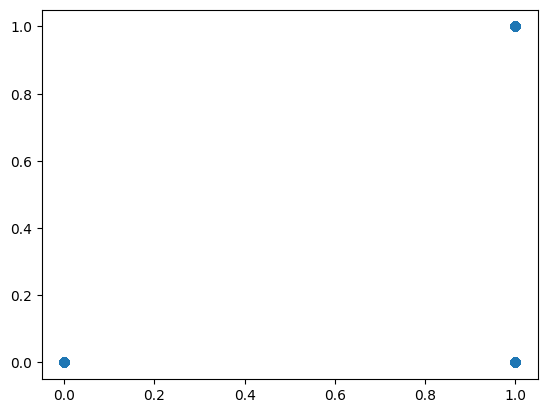

In [7]:
plt.scatter(df['PreviousFraud'],df['Fraud'])
plt.show()

Dependent and Independent Variables

In [8]:
x=df.iloc[:,2:9].values
x=pd.DataFrame(x)
y=df.iloc[:,9].values
y=pd.DataFrame(y)
print(x)
print(y)

                 0    1    2    3    4    5          6
0      3623.044171  3.0  1.0  1.0  1.0  0.0  18.002612
1      8760.570892  1.0  1.0  0.0  1.0  0.0  39.389780
2      7833.768690  1.0  3.0  1.0  1.0  0.0  58.910737
3      1689.499795  1.0  2.0  2.0  0.0  0.0  13.060114
4      5127.483033  1.0  0.0  2.0  0.0  0.0  22.115479
...            ...  ...  ...  ...  ...  ...        ...
11395  8743.977546  2.0  1.0  3.0  0.0  0.0  37.137271
11396  8830.024213  3.0  0.0  1.0  1.0  0.0   7.938164
11397  2284.710147  3.0  3.0  2.0  0.0  0.0  56.230099
11398  8960.132296  3.0  1.0  1.0  1.0  0.0  44.698173
11399  3422.096806  1.0  2.0  0.0  2.0  0.0  42.982250

[11400 rows x 7 columns]
       0
0      0
1      0
2      0
3      0
4      0
...   ..
11395  0
11396  0
11397  0
11398  0
11399  0

[11400 rows x 1 columns]


Splitting variables to Test and Train

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

Feature Scaling

In [10]:
st_x=StandardScaler()
x_train=st_x.fit_transform(x_train)
x_test=st_x.fit_transform(x_test)
print(x_train)

[[ 3.38828894e-01 -4.46418477e-01 -7.08991819e-01 ...  1.24761258e+00
  -5.62491981e-01 -5.72871824e-01]
 [-7.31697587e-01  4.49772642e-01  7.07169857e-01 ...  2.47434342e-02
  -5.62491981e-01 -2.84823358e-01]
 [ 4.28667816e-01 -1.34260960e+00  1.41525069e+00 ... -1.19812571e+00
  -5.62491981e-01 -7.92192916e-02]
 ...
 [ 4.66110721e-01 -4.46418477e-01 -9.10981195e-04 ... -1.19812571e+00
  -5.62491981e-01 -1.34170691e+00]
 [ 4.61921486e-02 -1.34260960e+00 -7.08991819e-01 ...  2.47434342e-02
   1.77780312e+00  8.04726730e-02]
 [-1.12253170e+00  4.49772642e-01 -9.10981195e-04 ...  1.24761258e+00
  -5.62491981e-01  1.45961543e+00]]


### SVM Model

In [11]:
from sklearn.svm import SVC

Model Fitting

In [12]:
classifier=SVC(kernel='linear',random_state=42)
classifier.fit(x_train,y_train)

SVC(kernel='linear', random_state=42)

Model Prediction

In [13]:
y_pred=classifier.predict(x_test)
print(y_pred)
print(y_test)

[0 0 0 ... 0 0 0]
      0
1766  0
2629  0
304   0
3247  1
4509  0
...  ..
1794  0
5008  0
1821  0
7639  0
7277  0

[2850 rows x 1 columns]


Model Evaluation

In [14]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.09719298245614034
mean squared error: 0.09719298245614034
root mean squared error: 0.3117578907680451


Prediction Accuracy

In [15]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy*100,"%")

90.28070175438596 %


### KNN Model

In [16]:
from sklearn.neighbors import KNeighborsClassifier

Model Fitting

In [17]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

Model Prediction

In [18]:
y_pred=classifier.predict(x_test)
print(y_pred)
print(y_test)

[0 0 1 ... 0 0 0]
      0
1766  0
2629  0
304   0
3247  1
4509  0
...  ..
1794  0
5008  0
1821  0
7639  0
7277  0

[2850 rows x 1 columns]


Model Evaluation

In [19]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.11754385964912281
mean squared error: 0.11754385964912281
root mean squared error: 0.3428466999245039


Prediction Accuracy

In [20]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy*100,"%")

88.24561403508771 %


### Logistic Model

In [21]:
from sklearn.linear_model import LogisticRegression

Model Fitting

In [22]:
model=LogisticRegression(max_iter=1000)
model.fit(x_test,y_test)

LogisticRegression(max_iter=1000)

Model Prediction

In [23]:
y_pred=model.predict(x_test)
print(y_test)
print(y_pred)

      0
1766  0
2629  0
304   0
3247  1
4509  0
...  ..
1794  0
5008  0
1821  0
7639  0
7277  0

[2850 rows x 1 columns]
[0 0 0 ... 0 0 0]


Model Evaluation

In [24]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.09578947368421052
mean squared error: 0.09578947368421052
root mean squared error: 0.3094987458524033


Pediction Accuracy

In [25]:
score=metrics.accuracy_score(y_test,y_pred)
print(score*100,"%")

90.42105263157895 %


### Random Forest Model

In [26]:
from sklearn.ensemble import RandomForestClassifier

Model Fitting

In [27]:
classifier=RandomForestClassifier(criterion='entropy',n_estimators=10,random_state=42)
classifier.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

Model Prediction

In [28]:
y_pred=classifier.predict(x_test)
print(y_test)
print(y_pred)

      0
1766  0
2629  0
304   0
3247  1
4509  0
...  ..
1794  0
5008  0
1821  0
7639  0
7277  0

[2850 rows x 1 columns]
[0 0 1 ... 0 0 0]


Model Evaluation

In [29]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.10350877192982456
mean squared error: 0.10350877192982456
root mean squared error: 0.3217277916652905


Prediction Accuracy

In [30]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy*100,"%")

89.64912280701755 %


### Decision Tree Model

In [31]:
from sklearn.tree import DecisionTreeClassifier

Model Fitting

In [32]:
classifier=DecisionTreeClassifier(criterion='entropy',random_state=42)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

Model Prediction

In [33]:
y_pred=classifier.predict(x_test)
print(y_pred)
print(y_test)

[0 0 1 ... 0 0 0]


      0
1766  0
2629  0
304   0
3247  1
4509  0
...  ..
1794  0
5008  0
1821  0
7639  0
7277  0

[2850 rows x 1 columns]


Model Evaluation

In [34]:
print("mean absolute error:",metrics.mean_absolute_error(y_test,y_pred))
print("mean squared error:",metrics.mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

mean absolute error: 0.11649122807017544
mean squared error: 0.11649122807017544
root mean squared error: 0.3413081131033592


Prediction Accuracy

In [35]:
accuracy=metrics.accuracy_score(y_test,y_pred)
print(accuracy*100,"%")

88.35087719298245 %


Conclusion:
In this fraud detection project, multiple machine learning models, including SVM, KNN, Random Forest, Decision Tree, and Logistic Regression, were implemented to classify transactions as fraudulent or non-fraudulent. Among these models, the Logistic Regression model achieved the highest accuracy of 90.42%, demonstrating its strong performance in identifying fraudulent transactions.

The model's high accuracy, combined with its interpretability and simplicity, makes Logistic Regression an effective choice for this classification task. This project highlights the importance of using machine learning techniques in financial fraud detection, offering a valuable tool for enhancing transaction security and mitigating financial risks.